<a href="https://colab.research.google.com/github/Dwarkamoye/Python-CS5590-490-0001/blob/master/LAB-2/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorboardcolab import *
from __future__ import print_function
import os
from datetime import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import metrics
# from keras.regularizers import l1l2
# from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://b1c37253.ngrok.io


In [0]:

df = pd.read_csv('heart.csv')
kc_data = pd.DataFrame(df, columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"])
label_col = 'Class'
print(kc_data.describe())

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


In [0]:
kc_x_train, kc_x_valid, kc_y_train, kc_y_valid = train_test_split(kc_data.iloc[:,0:13], kc_data.iloc[:,13],
                                                    test_size=0.3, random_state=87)

In [0]:
np.random.seed(155)
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df2 = pd.DataFrame()
    for c in col.columns:
        df2[c] = (col[c]-mu[c])/s[c]
    return df2

In [0]:
stats = norm_stats(kc_x_train, kc_x_valid)
arr_x_train = np.array(z_score(kc_x_train, stats))
arr_y_train = np.array(kc_y_train)
arr_x_valid = np.array(z_score(kc_x_valid, stats))
arr_y_valid = np.array(kc_y_valid)
print('Training shape:', arr_x_train.shape)
print('ddd',arr_y_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (212, 13)
ddd (212,)
Training samples:  212
Validation samples:  91


In [0]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation='sigmoid', input_shape=(x_size,)))
    # t_model.compile(optimizer='rmsprop', loss='binary_crossentropy')
    # t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="sigmoid"))
    t_model.add(Dense(y_size))
    t_model.compile(loss='binary_crossentropy',
        optimizer='rmsprop',
        metrics=[metrics.mae])
    return(t_model)

In [0]:
#basic_model_2 is different from basic_model_1 but doing the same task with different structure
def basic_model_2(x_size, y_size):


    # reg = l1l2(l1=0.01, l2=0.01)
    t_model = Sequential()
    t_model.add(Dense(100, activation='sigmoid', input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation='sigmoid'))
    t_model.add(Dense(20, activation='sigmoid'))
    t_model.add(Dense(y_size))
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizers = ['rmsprop', 'adam']
    t_model.compile(loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [0]:
model = basic_model_2(arr_x_train.shape[1], 1)

model.summary()
epochs = 20
batch_size =32

history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),callbacks=[TensorBoardColabCallback(tbc)])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               1400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 7,491
Trainable params: 7,491
Non-trainable params: 0
_________________________________________________________________
Train on 212 samples, validate on 91 samples
Epoch 1/20
 - 0s - loss: 0.6977 - mean_absolute_error: 0.4992 - val_loss: 0.6854 - val_mean_abs

In [0]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  0.5689 , Train Loss:  2.5651
Val MAE:  0.5707 , Val Loss:  2.4504


In [0]:
keras_callbacks = [
    ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2),
    ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0),
    TensorBoard(log_dir='./model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

In [0]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)

    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

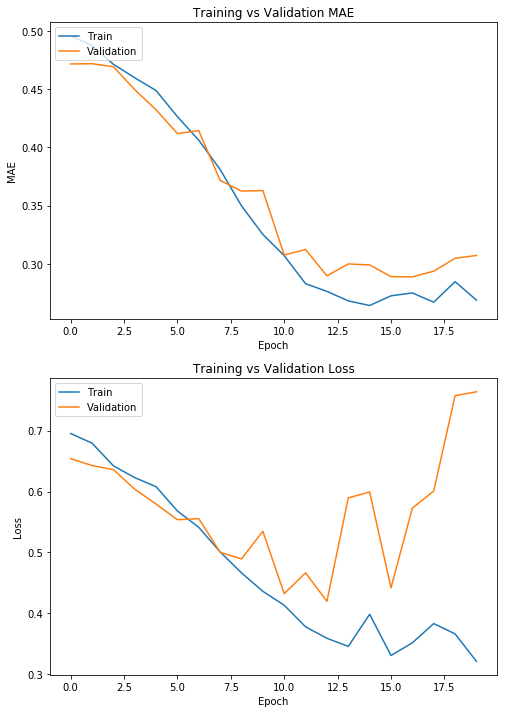

91/91 [==============================] - 0s 236us/step
test accuracy 0.3072091573542291


In [0]:
plot_hist(history.history, xsize=8, ysize=12)
score = model.evaluate(arr_x_valid,arr_y_valid)
print('test accuracy',score[1])

In [0]:
# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)